In [1]:
from helpers.utilities import *
%run helpers/notebook_setup.ipynb

# RNA-Seq

In [2]:
!ls data/clean/rna/

all_samples_counts.csv
all_samples.csv
clinical_data_ordered_to_match_rna_counts.csv
clinical_data_ordered_to_match_rna_deseq2.csv
definite_tbm_against_all.csv


In [3]:
gene_level_path = 'data/clean/rna/all_samples.csv'
clinical_path = 'data/clean/clinical/data.csv'

In [4]:
rna_levels = read_csv(gene_level_path, index_col=[0, 1])

In [5]:
assert not rna_levels.isnull().any().any()

In [6]:
rna_levels.head(3)

,,001.TMD,006.CM,012.BM,016.CM,017.TMD,...,174.CM,011.TMR,043.TMS,078.CM,261.CM
ensembl_id,ensembl_gene_id,,,,,,,,,,,
ENSG00000000003,TSPAN6,11.596119,7.806308,1.391555,39.347366,24.765008,...,4.431071,51.810470,35.628629,0.000000,20.705553
ENSG00000000005,TNMD,0.000000,0.000000,0.000000,2.459210,0.000000,...,0.000000,11.102244,0.000000,0.000000,4.141111
ENSG00000000419,DPM1,0.000000,31.225230,36.876198,0.000000,72.313823,...,25.478656,11.102244,0.000000,161.520987,39.754662


In [7]:
rna_levels.T.head(3)

ensembl_id,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,...,ENSG00000284543,ENSG00000284546,ENSG00000284552,ENSG00000284572,ENSG00000284600
ensembl_gene_id,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,...,LINC01226,SSU72P3,AC106774.10,AC099654.15,AC093390.2
001.TMD,11.596119,0.0,0.000000,127.557309,46.384476,...,92.768952,0.0,0.0,0.000000,11.596119
006.CM,7.806308,0.0,31.225230,145.717740,0.000000,...,200.361893,0.0,0.0,28.623128,23.418923
012.BM,1.391555,0.0,36.876198,86.276387,50.791744,...,27.135315,0.0,0.0,0.000000,4.174664


In [8]:
len(rna_levels), len(rna_levels.columns)

(38664, 49)

In [9]:
rna_levels = rna_levels.reset_index(level='ensembl_gene_id', drop=True)

In [10]:
%R -i rna_levels 

In [11]:
from plots.annotations import generate_patient_annotations

In [12]:
clinical_data = read_csv(clinical_path, index_col=0)
clinical_data.head(2)

,AdmissionDate,Birthday,Sex,PrevTB,PrevTBForm,...,condition,was_previous_tb_pulmonary,was_previous_tb_extrapulmonary,previous_tb_treatment,headache_days_corrected
PatientID,,,,,,,,,,,
001.TMD,2015-02-06,1980-01-04,M,False,NaN,...,TMD,NaN,NaN,NaN,15.0
006.CM,2015-02-11,1966-05-05,M,True,Pulmonary,...,CM,True,False,True,8.0


In [13]:
clinical_ordered = clinical_data.loc[rna_levels.columns]
patient_annotations = generate_patient_annotations(clinical_ordered)

In [14]:
%%R -i patient_annotations
source('plots/colors.R');
library(pheatmap)

colnames(rna_levels) <- sub('^X', '', colnames(rna_levels))
rownames(patient_annotations) <- colnames(rna_levels)
names(patient_annotations) <- sub('\\.', ' ', names(patient_annotations))

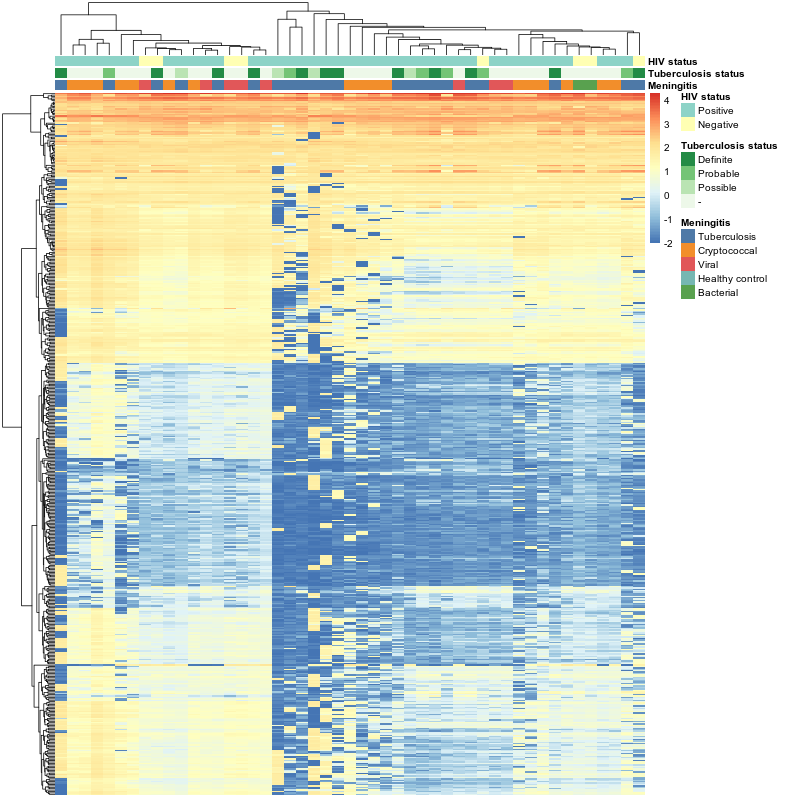

In [15]:
%%R -w 800 -h 800
pheatmap::pheatmap(
    log10(rna_levels + 0.01),
    show_colnames=FALSE,
    show_rownames=FALSE,
    kmeans_k=500,
    annotation_col=patient_annotations,
    annotation_colors=patient_colors
)